In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import Series, DataFrame

In [5]:
df = pd.read_csv('C:/Users/Windows10/Desktop/car price data.csv')
df

,Brand,Type,Color,Construction Year,Odometer,Ask Price,Days Until MOT,HP
0,Peugeot 106,1.0,blue,2002,166879,999,138,60
1,Peugeot 106,1.0,blue,1998,234484,999,346,60
2,Peugeot 106,1.1,black,1997,219752,500,-5,60
3,Peugeot 106,1.1,red,2001,223692,750,-87,60
4,Peugeot 106,1.1,grey,2002,120275,1650,356,59
5,Peugeot 106,1.1,red,2003,131358,1399,266,60
6,Peugeot 106,1.1,green,1999,304277,799,173,57
7,Peugeot 106,1.4,green,1998,93685,1300,0,75
8,Peugeot 106,1.1,white,2002,225935,950,113,60
9,Peugeot 106,1.4,green,1997,252319,650,133,75


In [6]:
# color one-hot
df_colors = df['Color'].str.get_dummies().add_prefix('Color: ')
# Type one-hot要先转化为字符串
df_type = df['Type'].apply(str).str.get_dummies().add_prefix('Type: ')
df = pd.concat([df, df_colors, df_type], axis = 1)
df = df.drop(['Brand', 'Type', 'Color'], axis = 1)
df

,Construction Year,Odometer,Ask Price,Days Until MOT,HP,Color: black,Color: blue,Color: green,Color: grey,Color: red,Color: white,Type: 1.0,Type: 1.1,Type: 1.4
0,2002,166879,999,138,60,0,1,0,0,0,0,1,0,0
1,1998,234484,999,346,60,0,1,0,0,0,0,1,0,0
2,1997,219752,500,-5,60,1,0,0,0,0,0,0,1,0
3,2001,223692,750,-87,60,0,0,0,0,1,0,0,1,0
4,2002,120275,1650,356,59,0,0,0,1,0,0,0,1,0
5,2003,131358,1399,266,60,0,0,0,0,1,0,0,1,0
6,1999,304277,799,173,57,0,0,1,0,0,0,0,1,0
7,1998,93685,1300,0,75,0,0,1,0,0,0,0,0,1
8,2002,225935,950,113,60,0,0,0,0,0,1,0,1,0
9,1997,252319,650,133,75,0,0,1,0,0,0,0,0,1


In [7]:
# one-hot get_dummies用法
df_test = DataFrame({'key':['b','b','a','c','a','b'],
               'data1':range(6)})
print(df_test)
print(df_test.values)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5
[['b' 0]
 ['b' 1]
 ['a' 2]
 ['c' 3]
 ['a' 4]
 ['b' 5]]


In [8]:
# one-hot get_dummies用法
print(pd.get_dummies(df_test['key']))
dummies = pd.get_dummies(df_test['key'],prefix = 'key')
df_with_dummy = df_test[['data1']].join(dummies)
print(df_with_dummy)

   a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0
   data1  key_a  key_b  key_c
0      0      0      1      0
1      1      0      1      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0


Text(0.5, 1.0, 'Car Price Variables')

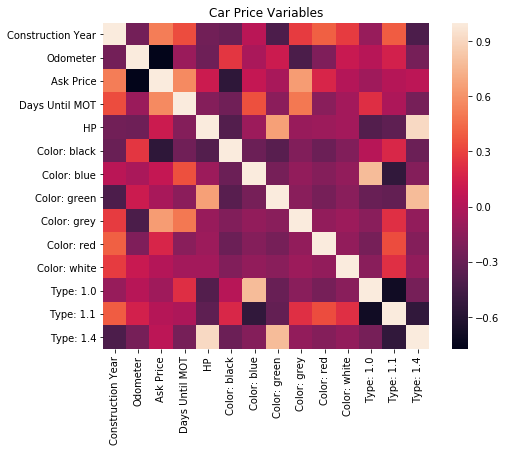

In [9]:
# 特征选择方法5：相关性分析，颜色越深相关性越大
matrix = df.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(matrix, square=True)
plt.title('Car Price Variables')

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
'''StandardScaler用来做特征的归一化，把原始特征转换成均值为0方差为1的高斯分布'''

'StandardScaler用来做特征的归一化，把原始特征转换成均值为0方差为1的高斯分布'

In [24]:
X = df[['Construction Year', 'Days Until MOT', 'Odometer']]
y = df['Ask Price'].values.reshape(-1,1)

# 这里的random_state就是为了保证程序每次运行都分割一样的训练集和测试集。否则，同样的算法模型在不同的训练集和测试集上的效果不一样
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, random_state=41)
X_train

,Construction Year,Days Until MOT,Odometer
10,1998,82,220000
5,2003,266,131358
8,2002,113,225935
11,1997,75,212000
1,1998,346,234484
12,2003,197,255134
2,1997,-5,219752
3,2001,-87,223692
0,2002,138,166879


In [32]:
X_normalizer = StandardScaler() #N(0,1)

# fit_transform先fit训练数据，从模型中提取方差，均值等参数，之后用在测试集上不用再fit
# 训练集和测试集做一致变换
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.fit_transform(X_test)
y_normalizer = StandardScaler() 
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.fit_transform(y_test)

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
X_train

array([[-0.87086357, -0.34426082,  0.28435463],
       [ 1.19170805,  1.12885524, -2.21494983],
       [ 0.77919372, -0.09607279,  0.45169485],
       [-1.2833779 , -0.40030328,  0.05879073],
       [-0.87086357,  1.76934049,  0.69273808],
       [ 1.19170805,  0.57643672,  1.27497491],
       [-1.2833779 , -1.04078852,  0.27736215],
       [ 0.3666794 , -1.6972859 ,  0.38845237],
       [ 0.77919372,  0.10407885, -1.2134179 ]])

In [34]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train, y_train.ravel())

ValueError: Found input variables with inconsistent numbers of samples: [9, 12]